In [1]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=df
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.svm import SVC

In [46]:
model=SVC()

In [47]:
model.fit(X_train,y_train)

SVC()

In [48]:
predictions=model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [60]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [62]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [63]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [64]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [66]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [68]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


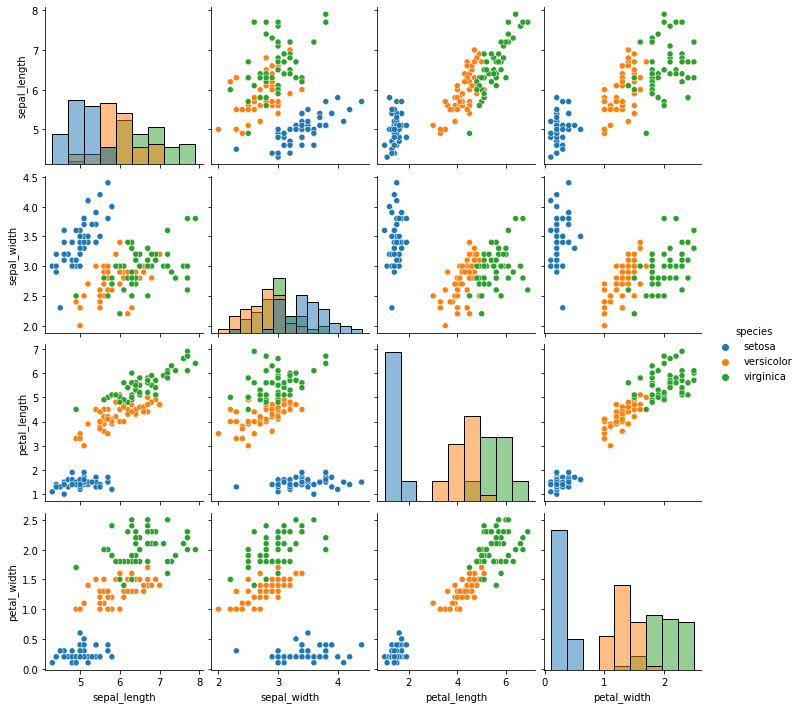

In [71]:
sns.pairplot(data=df,hue='species',diag_kind='hist')

In [ ]:
sns.kdeplot(data=df[df['species']=='setosa'], x='sepal_width', y='sepal_length',
                 cmap="plasma", shade=True, shade_lowest=False)

In [106]:
model=SVC()
X=df.drop('species',axis=1)
y=df['species']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [120]:
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [121]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[15  0  0]
 [ 0 14  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



In [122]:
param_grid={'C':[0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001]
}

In [123]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [124]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.955 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.955 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.826 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.909 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.864 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.864 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.696 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [125]:
g_preds=grid.predict(X_test)

In [126]:
print(confusion_matrix(y_test,g_preds))
print(classification_report(y_test,g_preds))

[[15  0  0]
 [ 0 14  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38

